In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
df=pd.read_csv(r"covid19datasheet_032820.csv")
df.head()

,Economy,ADB Country Code,Sector,Country 2018 GDP,Scenario,as % of total GDP,in Mn dollars,Employment (in 000),as % of sector GDP,as % of sector employment
0,Australia,AUS,"Agriculture, Mining and Quarrying",1433904.349,"Shorter containment, smaller demand shock",-0.33,"4,671.70",18,-2.7,-2.65
1,Australia,AUS,"Business, Trade, Personal, and Public Services",1433904.349,"Shorter containment, smaller demand shock",-1.41,"20,147.01",191,-2.31,-2.29
2,Australia,AUS,Hotel and restaurants and Other Personal Services,1433904.349,"Shorter containment, smaller demand shock",-0.35,"5,023.10",112,-6.7,-7.24
3,Australia,AUS,"Light/Heavy Manufacturing, Utilities, and Cons...",1433904.349,"Shorter containment, smaller demand shock",-0.39,"5,660.89",54,-2.31,-2.29
4,Australia,AUS,Transport services,1433904.349,"Shorter containment, smaller demand shock",-0.3,"4,307.48",47,-6.47,-7.22


In [18]:
df.describe()

,Country 2018 GDP,as % of total GDP,in Mn dollars,Employment (in 000),as % of sector GDP,as % of sector employment
count,1.576000e+03,1052.000000,1.052000e+03,1008.000000,1052.000000,1008.000000
mean,1.227601e+06,-1.164696,1.350465e+04,483.345238,-4.261027,-4.268413
std,3.105474e+06,1.601921,6.545321e+04,2720.667838,4.949044,5.029110
min,2.534965e+03,-14.170000,4.200000e-01,0.000000,-45.300000,-61.520000
25%,6.097170e+04,-1.410000,1.813500e+02,8.000000,-5.350000,-5.400000
50%,3.309103e+05,-0.510000,1.092225e+03,43.000000,-2.700000,-2.705000
75%,1.042173e+06,-0.190000,5.070800e+03,186.500000,-1.550000,-1.550000
max,2.054434e+07,0.000000,1.150160e+06,52784.000000,-0.040000,-0.030000


In [3]:
df = df.replace(',', '', regex=True)
df = df.replace("na",np.nan, regex=True)

In [4]:
# Convert the columns to float data type
df['as % of total GDP'] = df['as % of total GDP'].astype(float)
df[' in Mn dollars '] = df[' in Mn dollars '].astype(float)
df['Employment (in 000)'] = df['Employment (in 000)'].astype(float)
df['as % of sector GDP'] = df['as % of sector GDP'].astype(float)
df['as % of sector employment'] = df['as % of sector employment'].astype(float)

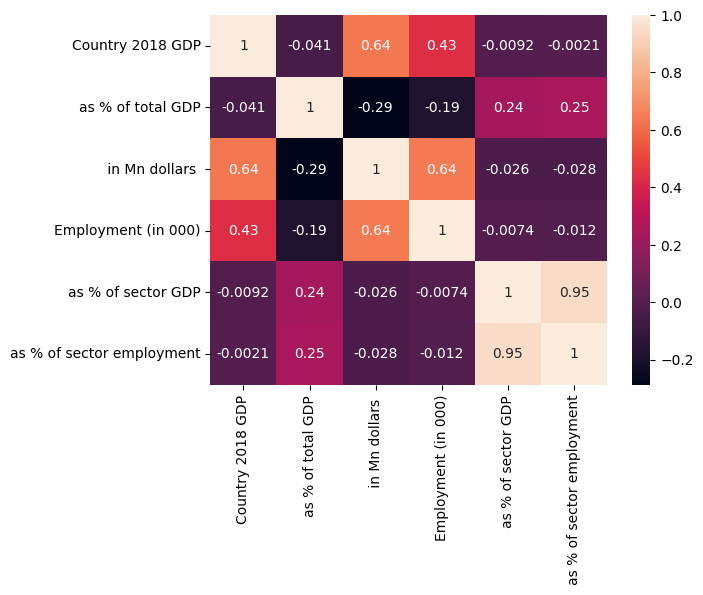

In [5]:
temp=df.select_dtypes(exclude=["object"])
sns.heatmap(temp.corr(), annot=True);

In [6]:
df.dtypes

Economy                       object
ADB Country Code              object
Sector                        object
Country 2018 GDP             float64
Scenario                      object
as % of total GDP            float64
 in Mn dollars               float64
Employment (in 000)          float64
as % of sector GDP           float64
as % of sector employment    float64
dtype: object

In [7]:
new_df=pd.DataFrame()

In [8]:
new_df["in Mn dollars"]=df.groupby("ADB Country Code")[" in Mn dollars "].sum()
new_df["Country 2018 GDP"]=df.groupby("ADB Country Code")["Country 2018 GDP"].sum()
new_df["as % of total GDP"]=df.groupby("ADB Country Code")["as % of total GDP"].sum()
new_df["Country 2017 GDP"]=(((new_df["as % of total GDP"]*(-1))*new_df["Country 2018 GDP"])/100)+new_df["Country 2018 GDP"]
new_df

,in Mn dollars,Country 2018 GDP,as % of total GDP,Country 2017 GDP
ADB Country Code,,,,
AUS,267218.51,3.441370e+07,-18.64,4.082842e+07
AUT,82900.23,1.092686e+07,-18.20,1.291555e+07
BAN,38294.20,7.672699e+06,-14.00,8.746877e+06
BEL,85227.75,1.302627e+07,-15.71,1.507269e+07
BGR,14454.32,1.563191e+06,-22.20,1.910219e+06
...,...,...,...,...
THA,149113.72,1.413980e+07,-29.53,1.831528e+07
TUR,167553.02,1.851241e+07,-21.71,2.253145e+07
UKG,480411.83,6.852712e+07,-16.84,8.006709e+07


In [9]:
fig = px.line(new_df[["Country 2018 GDP","Country 2017 GDP"]])
fig.update_layout(
    title="GDP Comparison for Countries",
    title_x=0.5,
    title_y=0.95
)
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="GDP(in $ million)")
fig.show()

In [10]:
fig = px.histogram(df, x='Country 2018 GDP', nbins=20, title='Distribution of Country 2018 GDP')
fig.update_xaxes(title_text='Country 2018 GDP')
fig.update_yaxes(title_text='Frequency')
fig.show()

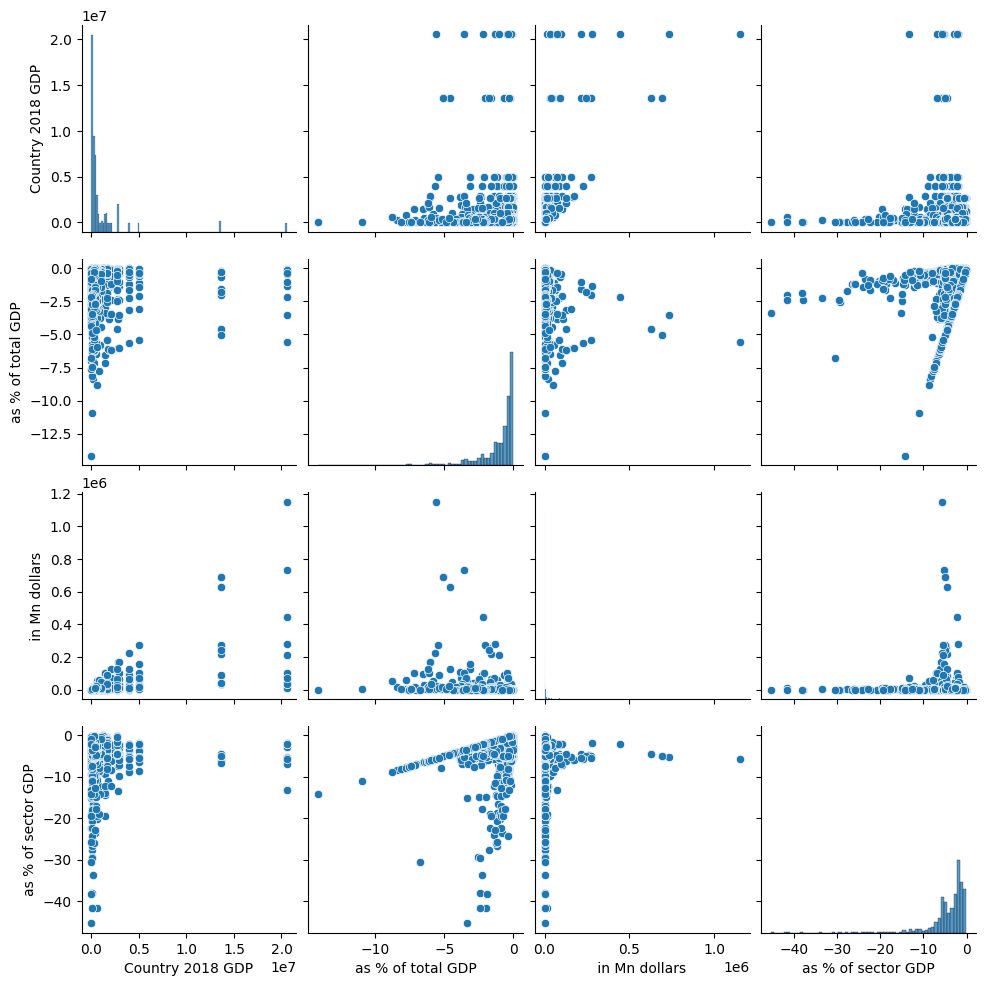

In [11]:
sns.pairplot(df[['Country 2018 GDP', 'as % of total GDP', ' in Mn dollars ', 'as % of sector GDP']])
plt.show()

In [17]:
fig = px.scatter(df, x=' in Mn dollars ', y='Employment (in 000)', title="Scatter plot of 'in Mn dollars' vs. 'Employment (in 000)'")
fig.update_layout(
    title_x=0.5,
    title_y=0.95
)
fig.show()

Which country has the highest economy?

In [12]:
maximum_gdp=new_df["Country 2018 GDP"].max()
for i in range(len(new_df["Country 2018 GDP"])):
    if new_df["Country 2018 GDP"][i]==maximum_gdp:
        x=i
        
print(new_df.index[x],":",maximum_gdp)

USA : 493064243.04
